In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Datasets\ola.csv") 
print(df.head())
df.info()
df.describe().T


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [3]:
df['datetime'] = df['dteday'] + ' ' + df['hr'].astype(str).str.zfill(2) + ':00:00'

# Splitting the 'datetime' column into 'date' and 'time'
parts = df["datetime"].str.split(" ", n=1, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

              datetime        date  time  
0  2011-01-01 00:00:00  2011-01-01     0  
1  201

In [4]:
parts = df["date"].str.split("-", n=2, expand=True)
df["day"] = parts[2].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[0].astype('int')

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...  windspeed  casual  registered  cnt             datetime  \
0           1  ...        0.0       3          13   16  2011-01-01 00:00:00   
1           1  ...        0.0       8          32   40  2011-01-01 01:00:00   
2           1  ...        0.0       5          27   32  2011-01-01 02:00:00   
3           1  ...        0.0       3          10   13  2011-01-01 03:00:00   
4           1  ...        0.0       0           1    1  2011-01-01 04:00:00   

         date  time day month  year  
0  2011-01-01     

In [5]:
from datetime import datetime

def weekend_or_weekday(year, month, day):
    d = datetime(year, month, day)
    return 0 if d.weekday() > 4 else 1  # 0 for weekend, 1 for weekday

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        0           0   
1        2  2011-01-01       1   0     1   1        0        0           0   
2        3  2011-01-01       1   0     1   2        0        0           0   
3        4  2011-01-01       1   0     1   3        0        0           0   
4        5  2011-01-01       1   0     1   4        0        0           0   

   weathersit  ...  windspeed  casual  registered  cnt             datetime  \
0           1  ...        0.0       3          13   16  2011-01-01 00:00:00   
1           1  ...        0.0       8          32   40  2011-01-01 01:00:00   
2           1  ...        0.0       5          27   32  2011-01-01 02:00:00   
3           1  ...        0.0       3          10   13  2011-01-01 03:00:00   
4           1  ...        0.0       0           1    1  2011-01-01 04:00:00   

         date  time day month  year  
0  2011-01-01     

In [6]:
def am_or_pm(x):
    return 1 if x > 11 else 0  # 1 for PM, 0 for AM

df['am_or_pm'] = df['hr'].apply(am_or_pm)

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        0           0   
1        2  2011-01-01       1   0     1   1        0        0           0   
2        3  2011-01-01       1   0     1   2        0        0           0   
3        4  2011-01-01       1   0     1   3        0        0           0   
4        5  2011-01-01       1   0     1   4        0        0           0   

   weathersit  ...  casual  registered  cnt             datetime        date  \
0           1  ...       3          13   16  2011-01-01 00:00:00  2011-01-01   
1           1  ...       8          32   40  2011-01-01 01:00:00  2011-01-01   
2           1  ...       5          27   32  2011-01-01 02:00:00  2011-01-01   
3           1  ...       3          10   13  2011-01-01 03:00:00  2011-01-01   
4           1  ...       0           1    1  2011-01-01 04:00:00  2011-01-01   

   time  day month  year  am_or_pm  
0     0    1 

In [7]:
from datetime import date
import holidays

def is_holiday(x):
    india_holidays = holidays.country_holidays('IN')
    return 1 if india_holidays.get(x) else 0

df['holidays'] = df['date'].apply(is_holiday)

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        0           0   
1        2  2011-01-01       1   0     1   1        0        0           0   
2        3  2011-01-01       1   0     1   2        0        0           0   
3        4  2011-01-01       1   0     1   3        0        0           0   
4        5  2011-01-01       1   0     1   4        0        0           0   

   weathersit  ...  registered  cnt             datetime        date  time  \
0           1  ...          13   16  2011-01-01 00:00:00  2011-01-01     0   
1           1  ...          32   40  2011-01-01 01:00:00  2011-01-01     1   
2           1  ...          27   32  2011-01-01 02:00:00  2011-01-01     2   
3           1  ...          10   13  2011-01-01 03:00:00  2011-01-01     3   
4           1  ...           1    1  2011-01-01 04:00:00  2011-01-01     4   

   day  month  year am_or_pm  holidays  
0    1      1  2011  

In [8]:
df.drop(['dteday', 'date'], axis=1, inplace=True)


In [9]:
print(df.isnull().sum())


instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
datetime      0
time          0
day           0
month         0
year          0
am_or_pm      0
holidays      0
dtype: int64


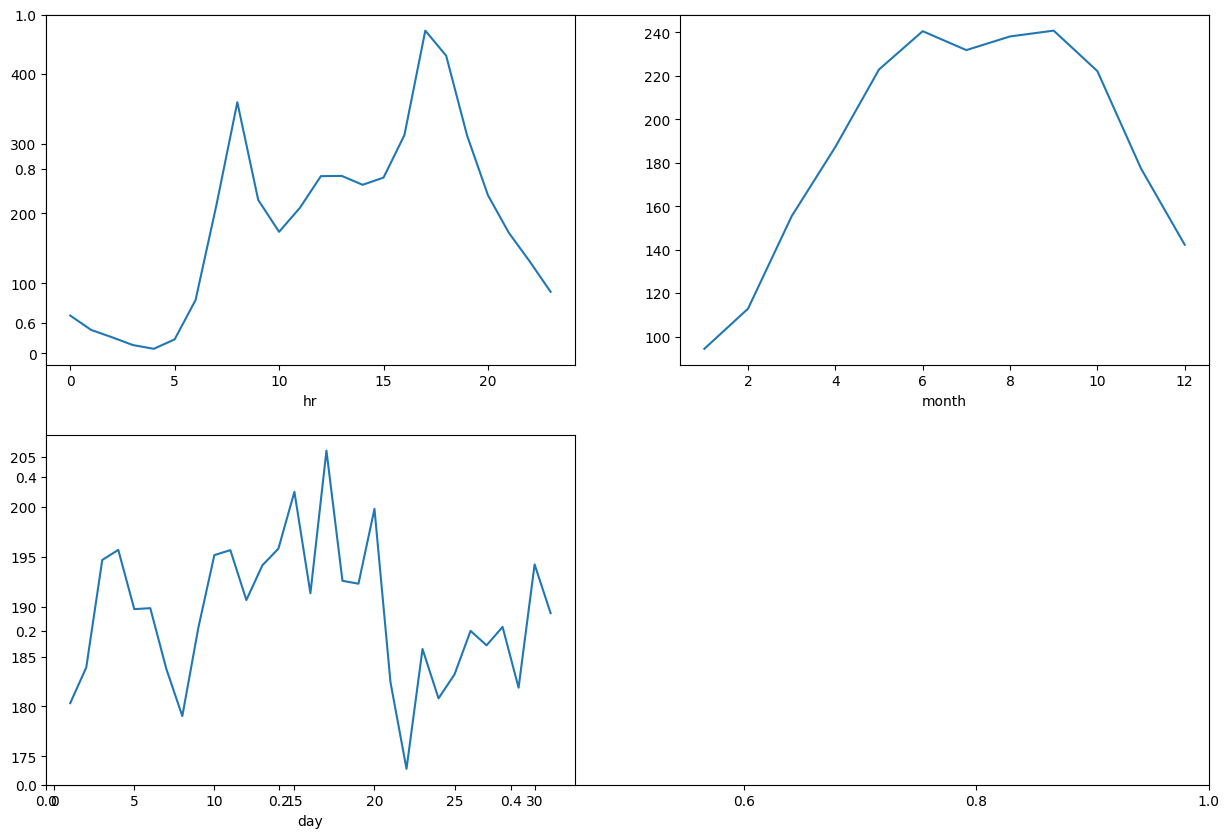

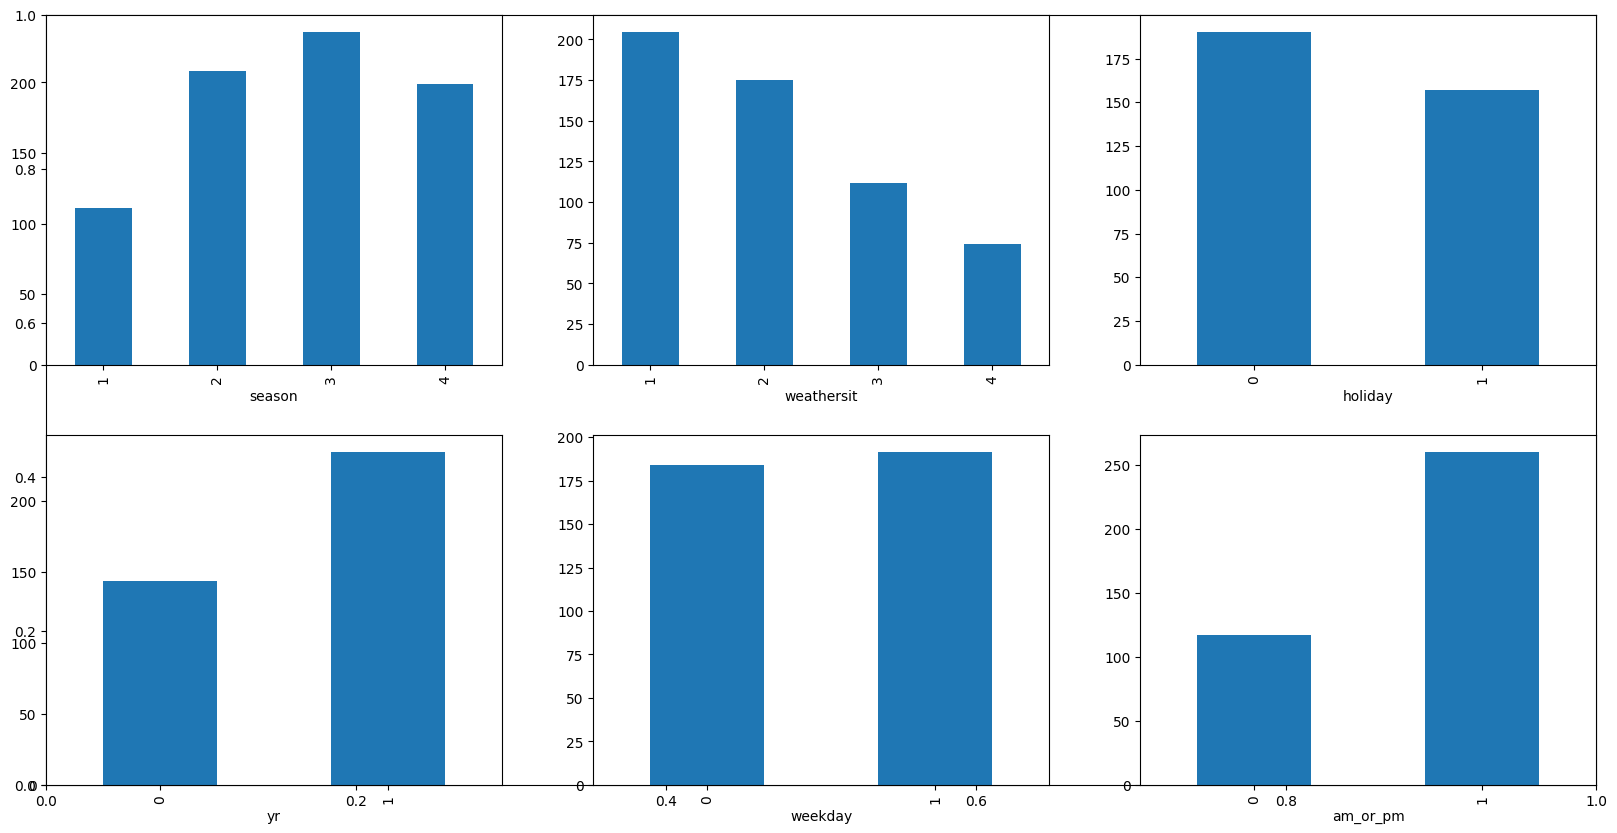

In [10]:
features = ['hr', 'month', 'day']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df['cnt'] = pd.to_numeric(df['cnt'], errors='coerce')
    df.dropna(subset=['cnt'], inplace=True)
    df.groupby(col)['cnt'].mean().plot()
plt.show()

# Second set of features
features = ['season', 'weathersit', 'holiday', 'yr', 'weekday', 'am_or_pm']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col)['cnt'].mean().plot.bar()
plt.show()


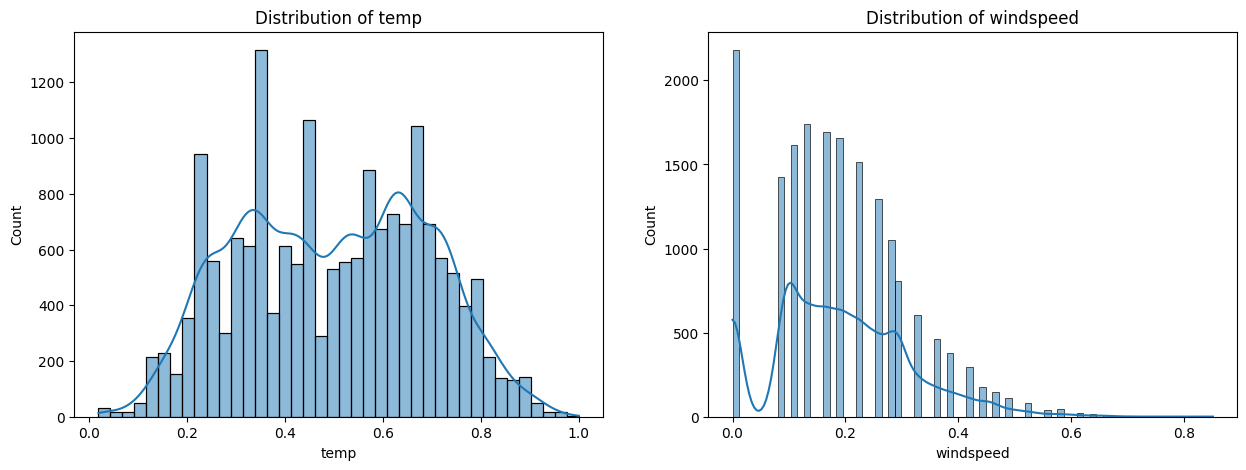

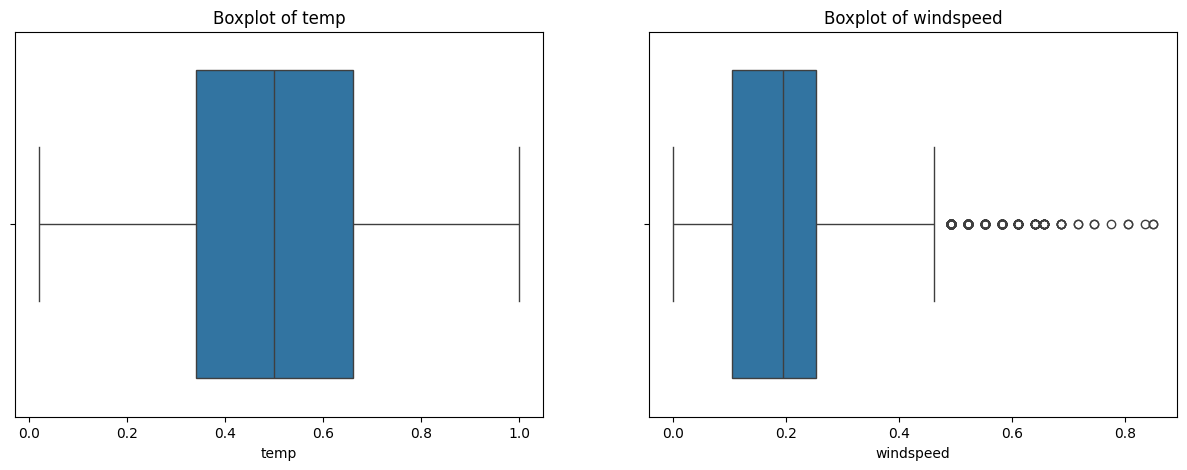

In [11]:
features = ['temp', 'windspeed']

# Distribution plot
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

# Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()


In [12]:
num_rows = df[df['windspeed'] >= 32].shape[0]
print(f'Number of rows that will be lost if we remove outliers: {num_rows}')

# Remove outliers
df = df[(df['windspeed'] < 32) & (df['hum'] > 0)]


Number of rows that will be lost if we remove outliers: 0


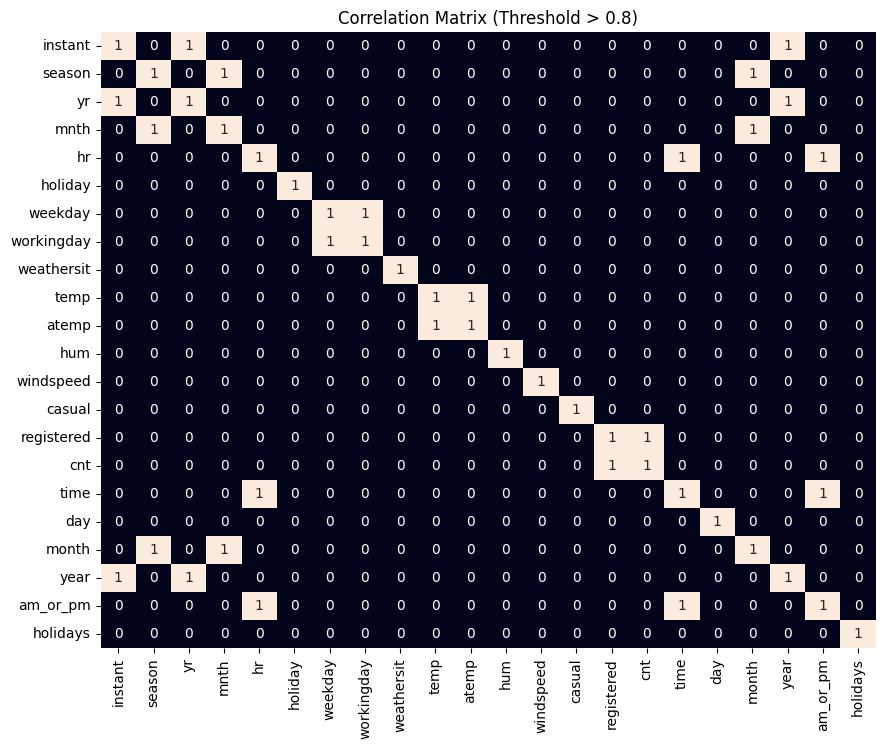

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap for correlation greater than 0.8
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_df.corr() > 0.8, annot=True, cbar=False)
plt.title('Correlation Matrix (Threshold > 0.8)')
plt.show()



In [14]:
# Dropping 'registered', 'time', and any other non-numeric columns
#df.drop(['registered', 'time'], axis=1, inplace=True)

# Ensure all remaining columns are numeric
numeric_features = df.select_dtypes(include=[np.number])

# Split features and target
features = numeric_features.drop(['cnt'], axis=1)
target = numeric_features['cnt']

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.1, random_state=22)

print(X_train.shape, X_val.shape)

# Initialize StandardScaler and scale only the numeric features
scaler = StandardScaler()

# Fit and transform X_train
X_train = scaler.fit_transform(X_train)

# Transform X_val using the scaler fitted on X_train
X_val = scaler.transform(X_val)

# Now proceed with model training



(15621, 21) (1736, 21)


In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the training set
train_preds_rf = rf_model.predict(X_train)
train_mae_rf = mae(Y_train, train_preds_rf)

# Make predictions on the validation set
val_preds_rf = rf_model.predict(X_val)
val_mae_rf = mae(Y_val, val_preds_rf)

# Print the results
print('RandomForestRegressor:')
print(f'Training Error (MAE): {train_mae_rf}')
print(f'Validation Error (MAE): {val_mae_rf}')

# Now let's compare RandomForest performance with other models
models = [
    LinearRegression(),
    XGBRegressor(),
    Lasso(),
    Ridge(),
    RandomForestRegressor(n_estimators=100, random_state=22)  # Including RandomForestRegressor here as well
]

# Loop through the models, fit and evaluate them
for model in models:
    model.fit(X_train, Y_train)

    print(f'{model.__class__.__name__} : ')

    train_preds = model.predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = model.predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))

    print()


RandomForestRegressor:
Training Error (MAE): 0.36076691633058067
Validation Error (MAE): 1.0119873271889401
LinearRegression : 
Training Error :  2.615011963308889e-13
Validation Error :  2.622868640148545e-13

XGBRegressor : 
Training Error :  1.2192696997469317
Validation Error :  2.188444013625795

Lasso : 
Training Error :  0.8980822234886641
Validation Error :  0.9083015134058235

Ridge : 
Training Error :  0.00850299945165204
Validation Error :  0.009157724024975748

RandomForestRegressor : 
Training Error :  0.36076691633058067
Validation Error :  1.0119873271889401



In [16]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk

df = pd.read_csv(r"C:\Datasets\ola.csv")

# Splitting dataset into features (X) and target (y)
X = df[['hr', 'weathersit', 'temp', 'hum', 'windspeed', 'mnth', 'weekday', 'yr', 'holiday', 'workingday']]
y = df['cnt']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=22)
rf_model.fit(X_train, y_train)  # Fit the model to the training data

# Function to predict demand
def predict_demand():
    try:
        # Validate and convert inputs
        hour = int(hour_entry.get())
        weather = weather_combobox.get()
        temp = float(temp_entry.get())
        humidity = float(humidity_entry.get())
        windspeed = float(windspeed_entry.get())
        month = int(month_combobox.get())
        weekday = weekday_combobox.get()
        year = int(year_entry.get())
        holiday = int(holiday_entry.get())
        working_day = int(working_day_combobox.get())

        # Check for empty fields
        if not hour or not weather or not temp or not humidity or not windspeed or not year:
            messagebox.showerror("Input Error", "Please fill in all fields")
            return

        # Map weekday to numerical value
        weekday_mapping = {
            'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
            'Friday': 4, 'Saturday': 5, 'Sunday': 6
        }
        
        if weekday not in weekday_mapping:
            messagebox.showerror("Input Error", "Invalid weekday selection")
            return

        weekday_num = weekday_mapping[weekday]

        # Map weather condition to numerical value
        weather_mapping = {
            'Clear, Few clouds, Partly cloudy': 1,
            'Mist + Cloudy, Mist + Broken clouds': 2,
            'Light Snow, Light Rain, Thunderstorm': 3,
            'Heavy Rain, Snow, Ice pellets': 4
        }

        if weather not in weather_mapping:
            messagebox.showerror("Input Error", "Invalid weather selection")
            return

        weather_num = weather_mapping[weather]

        # Create feature array for prediction
        features = np.array([[hour, weather_num, temp, humidity, windspeed, month, weekday_num, year, holiday, working_day]])
        features_scaled = scaler.transform(features)  # Don't forget to scale new data!

        # Make prediction
        prediction = rf_model.predict(features_scaled)[0]

        # Display predicted demand
        result_label.config(text=f"Predicted Demand: {int(prediction)}")

    except ValueError as e:
        messagebox.showerror("Invalid Input", f"Invalid input provided: {e}")

# Creating the main window
root = tk.Tk()
root.title("Demand Prediction")
root.geometry("1200x800")  # Large screen size


image = Image.open(r"C:\Users\grmus\Downloads\demand.jpg")  # Add your image file path here
background_image = ImageTk.PhotoImage(image)
root.background_image = background_image  # Store reference in root
background_label = ttk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# Title
title_label = ttk.Label(root, text="Demand Prediction", font=("Helvetica", 20), background="#2BF38F")
title_label.place(x=500, y=30)

# Hour
hour_label = ttk.Label(root, text="Hour:", background="#2BF38F")
hour_label.place(x=100, y=100)
hour_entry = ttk.Entry(root)
hour_entry.place(x=250, y=100)

# Weather (Dropdown)
weather_label = ttk.Label(root, text="Weather:", background="#2BF38F")
weather_label.place(x=100, y=150)
weather_combobox = ttk.Combobox(root, values=["Clear, Few clouds, Partly cloudy",
                                              "Mist + Cloudy, Mist + Broken clouds",
                                              "Light Snow, Light Rain, Thunderstorm",
                                              "Heavy Rain, Snow, Ice pellets"], state="readonly")
weather_combobox.place(x=250, y=150)

# Temperature
temp_label = ttk.Label(root, text="Temp:", background="#2BF38F")
temp_label.place(x=100, y=200)
temp_entry = ttk.Entry(root)
temp_entry.place(x=250, y=200)

# Humidity
humidity_label = ttk.Label(root, text="Humidity:", background="#2BF38F")
humidity_label.place(x=100, y=250)
humidity_entry = ttk.Entry(root)
humidity_entry.place(x=250, y=250)

# Windspeed
windspeed_label = ttk.Label(root, text="Windspeed:", background="#2BF38F")
windspeed_label.place(x=100, y=300)
windspeed_entry = ttk.Entry(root)
windspeed_entry.place(x=250, y=300)

# Month (Dropdown)
month_label = ttk.Label(root, text="Month:", background="#2BF38F")
month_label.place(x=100, y=350)
month_combobox = ttk.Combobox(root, values=[i for i in range(1, 13)], state="readonly")
month_combobox.place(x=250, y=350)

# Weekday (Dropdown)
weekday_label = ttk.Label(root, text="Weekday:", background="#2BF38F")
weekday_label.place(x=100, y=400)
weekday_combobox = ttk.Combobox(root, values=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], state="readonly")
weekday_combobox.place(x=250, y=400)

# Year
year_label = ttk.Label(root, text="Year:", background="#2BF38F")
year_label.place(x=100, y=450)
year_entry = ttk.Entry(root)
year_entry.place(x=250, y=450)

# Holiday
holiday_label = ttk.Label(root, text="Holiday (0=No, 1=Yes):", background="#2BF38F")
holiday_label.place(x=100, y=500)
holiday_entry = ttk.Entry(root)
holiday_entry.place(x=250, y=500)

# Working Day (Dropdown)
working_day_label = ttk.Label(root, text="Working Day (0=No, 1=Yes):", background="#2BF38F")
working_day_label.place(x=100, y=550)
working_day_combobox = ttk.Combobox(root, values=[0, 1], state="readonly")
working_day_combobox.place(x=250, y=550)

# Predict Button
predict_button = ttk.Button(root, text="Predict Demand", command=predict_demand)
predict_button.place(x=500, y=600)

# Result Label
result_label = ttk.Label(root, text="Predicted Demand: ", font=("Helvetica", 14), background="#2BF38F")
result_label.place(x=500, y=650)

# Running the application
root.mainloop()